In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [38]:
def load_agent_data(file_path,maxiter,spacing,,dataname='Baseline'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(5):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,ignore_index=True,axis=0)
    return total_data

SyntaxError: invalid syntax (Temp/ipykernel_14508/3995313412.py, line 1)

In [39]:
def load_base_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(3):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1:
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        s_rate = np.ones(train_epoch.shape[0])
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,ignore_index=True,axis=0)
    return total_data

In [40]:
def load_ith_data(file_path,index,maxepoch,space,dataname):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)
    train_epoch = np.arange(0,maxepoch+1,space)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':dataname})
    return df
def load_vdn_data(file_path,numtimes=5,maxepoch=100,space=5,dataname='VDN'):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(numtimes):
        df = load_ith_data(file_path,i,maxepoch,space,dataname)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

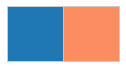

In [41]:
sns.set_theme(context='paper', style='whitegrid', font='Arial', font_scale=1.8)
# color = sns.color_palette('Paired',10)
color=[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
sns.palplot(color)
sns.set_palette(color)

In [42]:
ppodata2d = load_agent_data('PPO-2d',100,5)
basedata2d = load_base_data('Base-2d',100,5)
vdndata2d = load_vdn_data('vdn-2d',4,100,5)

In [43]:
totaldata2d = pd.concat([ppodata2d,vdndata2d],ignore_index=True,axis=0)

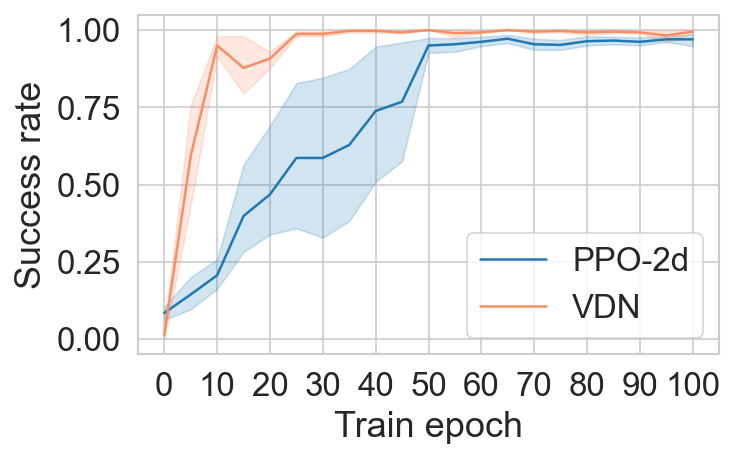

In [44]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)
# ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,101,10))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

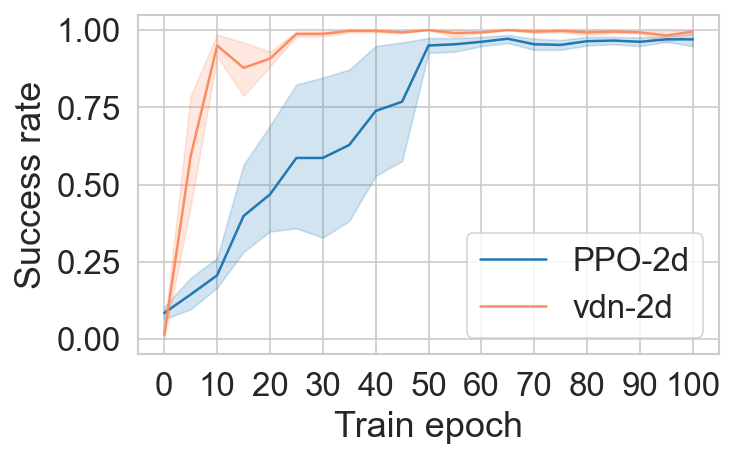

In [32]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=totaldata2d)
# ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,101,10))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

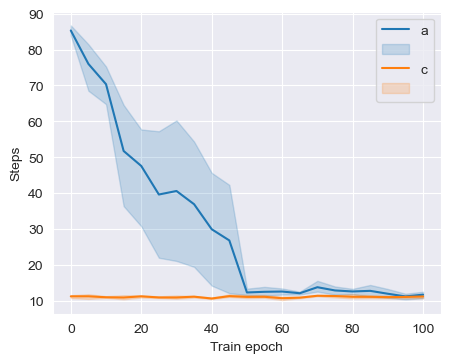

In [24]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',data=totaldata2d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

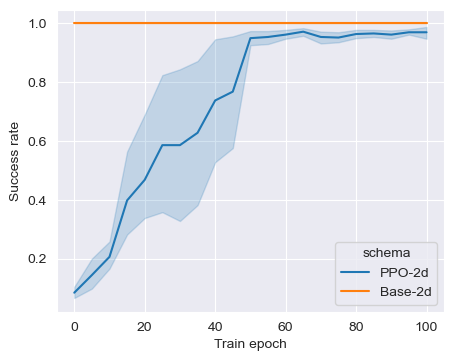

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)

In [31]:
ppodata3d = load_agent_data('PPO-3d',200,5)
basedata3d = load_base_data('Base-3d',200,5)

In [34]:
totaldata3d = pd.concat([ppodata3d,basedata3d],ignore_index=True,axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

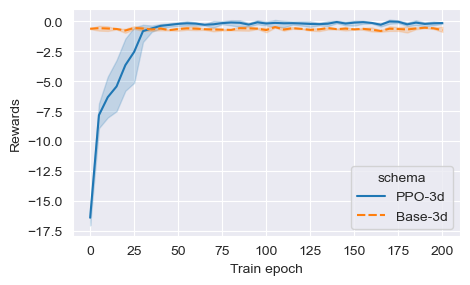

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

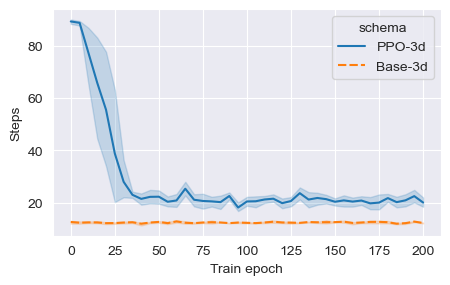

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

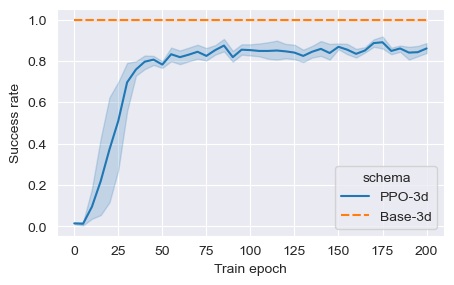

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata3d)

In [ ]:
ppodata4d = load_agent_data('PPO-4d',150,2)
basedata4d = load_base_data('Base-4d',150,2)
totaldata4d = pd.concat([ppodata4d,basedata4d],axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

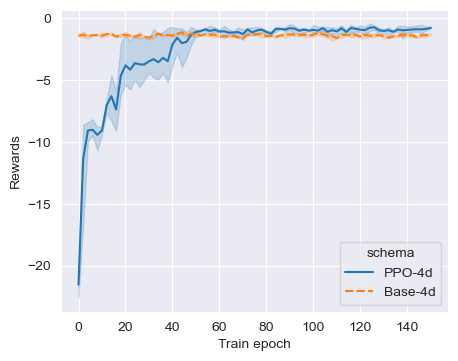

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

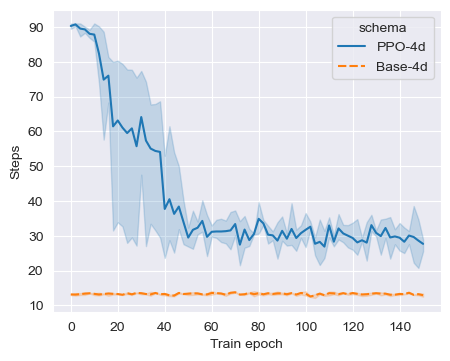

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

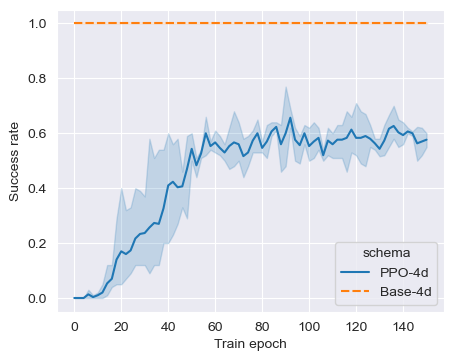

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata4d)